Project description

What is the target with relation to this project?

Target is to create an end to end structure of a model where input data is provided and output is Generated in a uder friendly UI.

Also to use maximum different ML algorithms which can be used on supervised learning and to compared the dfferencein their results.

In the end we will compare why one algoirithm performed better than the other.

What all libraries we will use?

Pandas-- For dataframe and data analysis
Numpy-- For mathematical operation and vectorization on the data points
Seaborn-- We will explore and create all the graphs and visulizations only using seaborn even if beeter options available, as we need to learn seaborn better.

We cannot store data of this project on GitHub as data is too big.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score


In [3]:
data=pd.read_csv('Fraud.csv')
data.shape

(6362620, 11)

In [4]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


## Understanding each columns and idea behind them

## Type

Type is that how this transaction did took place?

In [5]:
data['type'].unique()
# Payment is Online Payment of something
# Transfer is transfering money to someone
# Cash_out means taking out cash either by ATM or bank Branch
# Debit means deduction of money from account for any purpose
# cash_in means putting money in through cash


array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

## let's check if there are any NULL values in datsets

In [6]:
data.isnull().sum()
# As we can see there are no Null value sin the whole dataset which is quite unique and rarely happens in real world.

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00


## Deciding on columns or features to keep.



In [8]:
data=data.drop(['nameDest','nameOrig'],axis=1)
data.head()

#Name destination and Name Origin was not addingg anything valuable to the dataset


,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


## Check for collinearity between features

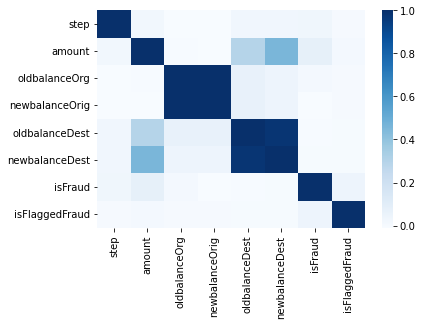

In [9]:
corr_plot=sns.heatmap(data.corr(),cmap='Blues')
plt.show()

# We can see that there is a huge level of collinearity between newbalance orif=gin and old balance Origin 
# and new balance destination and old balance destination which make sense also.


## Dealing with multicollinearity both by deleting one of the column as well as by PCA

In [10]:
# Let's delete one of the columns. let's delete both old balance Origin and old balance detination

data_copy= data.drop(['oldbalanceOrg','oldbalanceDest'], axis=1)
data_copy.head()

,step,type,amount,newbalanceOrig,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,160296.36,0.0,0,0
1,1,PAYMENT,1864.28,19384.72,0.0,0,0
2,1,TRANSFER,181.00,0.00,0.0,1,0
3,1,CASH_OUT,181.00,0.00,0.0,1,0
4,1,PAYMENT,11668.14,29885.86,0.0,0,0


In [11]:
# We will do changes using PCA later and will check for the change in results

In [12]:
df_input=data_copy.drop(['isFraud'],axis=1)
df_input.head()

,step,type,amount,newbalanceOrig,newbalanceDest,isFlaggedFraud
0,1,PAYMENT,9839.64,160296.36,0.0,0
1,1,PAYMENT,1864.28,19384.72,0.0,0
2,1,TRANSFER,181.00,0.00,0.0,0
3,1,CASH_OUT,181.00,0.00,0.0,0
4,1,PAYMENT,11668.14,29885.86,0.0,0


## Our output is a binary classification issue though the data seems neumerical. Remember that to correctly get the result we need to have classification metrics and models that work on such data.

In [13]:
df_output=data_copy['isFraud']


## Let's work on categorical data

In [14]:
ohe=OneHotEncoder()
enc_data = pd.DataFrame(ohe.fit_transform(df_input[['type']]).toarray())
df=df_input.join(enc_data)
df=df.drop(['type'],axis=1)
df.head()

# Here we have converted type into newumerical data using OHE. and then we dropped the type column from the dataset

,step,amount,newbalanceOrig,newbalanceDest,isFlaggedFraud,0,1,2,3,4
0,1,9839.64,160296.36,0.0,0,0.0,0.0,0.0,1.0,0.0
1,1,1864.28,19384.72,0.0,0,0.0,0.0,0.0,1.0,0.0
2,1,181.00,0.00,0.0,0,0.0,0.0,0.0,0.0,1.0
3,1,181.00,0.00,0.0,0,0.0,1.0,0.0,0.0,0.0
4,1,11668.14,29885.86,0.0,0,0.0,0.0,0.0,1.0,0.0


## Now let's do the train test split

In [15]:
X_train,X_test,y_train,y_test=train_test_split(df,df_output,test_size=0.2)
X_train.shape



(5090096, 10)

## Create a function to run multiple ML algorithms and provide accuracy Score

In [16]:
def run_multiple_models(model,X_train,y_train,X_test,y_test):
    result={}
    for model_name, model in models.items():
        model.fit(X_train,y_train)
        
        y_pred_prob = model.predict_proba(X_test)[:, 1]  # Assuming binary classification

        # Convert probabilities to binary predictions
        y_pred = (y_pred_prob > 0.5).astype(int)

        
        
        
        
        
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        # Store the results
        result[model_name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-score': f1}

        
#         result[model_name]=accuracy
        
    return result
        
    
    

## Now run all the models and test the accuracy

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [ ]:
# Create the dictionary of models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier()
}

# Call the function to run the models
result = run_multiple_models(models, X_train, y_train, X_test, y_test)

# Print the results
for model_name, accuracy in result.items():
    print(f"{model_name}: Accuracy = {accuracy}")